In [ ]:
import sys
sys.path.append('../')

from dataclasses import dataclass
import torch
import random
import matplotlib.pyplot as plt

from modules import get_model
from dataset import UTSDataset

In [2]:
@dataclass
class NotebookConfig:
  context_size: int = 1024 # the length of the context signal
  forecast_horizon: int = 64 # the length of the forecast horizon
  context_plot_limit: int = 300 # not show the whole context but last 'context_plot_limit' observations (just for visualization)

config_nb = NotebookConfig()

In [3]:
dataset = UTSDataset(input_len=config_nb.context_size, output_len=config_nb.forecast_horizon, stride=128, flag="val", subset_name="UTSD-1G")

Resolving data files:   0%|          | 0/320 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/80 [00:00<?, ?it/s]

Indexing dataset...


100%|██████████| 68679/68679 [00:26<00:00, 2606.38it/s]


In [8]:
model = get_model(revin_strategy="CausalRevIN", use_asinh=True, device="cuda")

Text(0.5, 1.0, 'Forecasting with Normalizer Model')

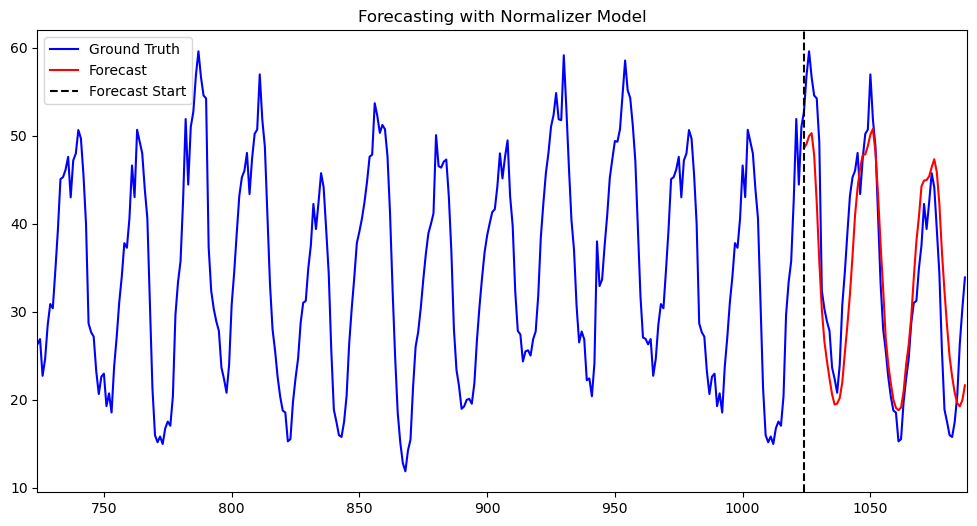

In [17]:
idx = random.randint(0, len(dataset))
context, target = dataset[idx]

xx = torch.cat([context, target], dim=0)

context_torch = context.unsqueeze(0).to("cuda")
pred = model.forecast(context_torch, target_len=config_nb.forecast_horizon)
pred = pred.squeeze(0).cpu().detach()

plt.figure(figsize=(12, 6))
plt.plot(xx.numpy(), label="Ground Truth", color="blue")
plt.plot(range(len(context), len(context) + len(pred)), pred.numpy(), label="Forecast", color="red")
plt.axvline(x=len(context), color="black", linestyle="--", label="Forecast Start")
plt.xlim(max(0, len(context) - config_nb.context_plot_limit), len(context) + config_nb.forecast_horizon)
plt.legend()
plt.title("Forecasting with Normalizer Model")